# CSCI 390: Machine Learning

File name: Turauth_HW1.ipynb

The purpose of this file is to explore the application of decision tree models to a data set of census data.

## Part 2

In [1]:
# Mount Google Drive to this notebook.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import decision tree data reading functionality.
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

# Show the file where to find the census data.
pathName = "/content/drive/MyDrive/Colab Notebooks/HW1/Data/"

# Read the data.
columnsToRead = ["AGI_BIN", "A_AGE_BIN", "WKSWORK_BIN", "A_SEX_BIN", "HAS_DIV"]
dataFrame = pd.read_excel(pathName + 'Census_Supplement.xlsx', sheet_name='Data', usecols=columnsToRead)


X = dataFrame.drop(["HAS_DIV"], axis=1)
y = dataFrame.HAS_DIV

# Partition the data into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Create a tree object to do classification.
clf = tree.DecisionTreeClassifier(criterion="entropy", splitter='best', max_depth=3)
clf = clf.fit(X_train, y_train)

# Print the confusion matrix.
y_true = y_test
y_pred = clf.predict(X_test)
print(confusion_matrix(y_true, y_pred))

# Print the cross-validation scores.
scores = cross_val_score(clf, X_train, y_train)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[[19529   592]
 [ 9127   752]]
0.67 accuracy with a standard deviation of 0.00


The different Decision_Tree_Classifier depths have equal performance for both the entropy and the gini criteria. I reached this conclusion by running this cell after repeatedly altering "criterion" and "max_depth."

In [5]:
import pydotplus
import collections

# Write the classifier tree to a PNG file.

def writegraphtofile(clf, featurenames, classnames, pathname):
  dot_data = tree.export_graphviz(clf, feature_names=featurenames, impurity=True,
                                  class_names=classnames, filled=True, rounded=True, special_characters=True)
  graph = pydotplus.graph_from_dot_data(dot_data)
  colors = ('lightblue','lightgreen')
  edges = collections.defaultdict(list)
  for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
  for edge in edges:
    edges[edge].sort()
    for i in range(2):
      dest = graph.get_node(str(edges[edge][i]))[0]
      dest.set_fillcolor(colors[i])
  graph.write_png(pathname)

featureNames = ["AGI_BIN", "A_AGE_BIN", "WKSWORK_BIN", "A_SEX_BIN"]

writegraphtofile(clf, featureNames, ("0", "1"), "/content/drive/MyDrive/Colab Notebooks/HW1/Output/"+"conttree.png")

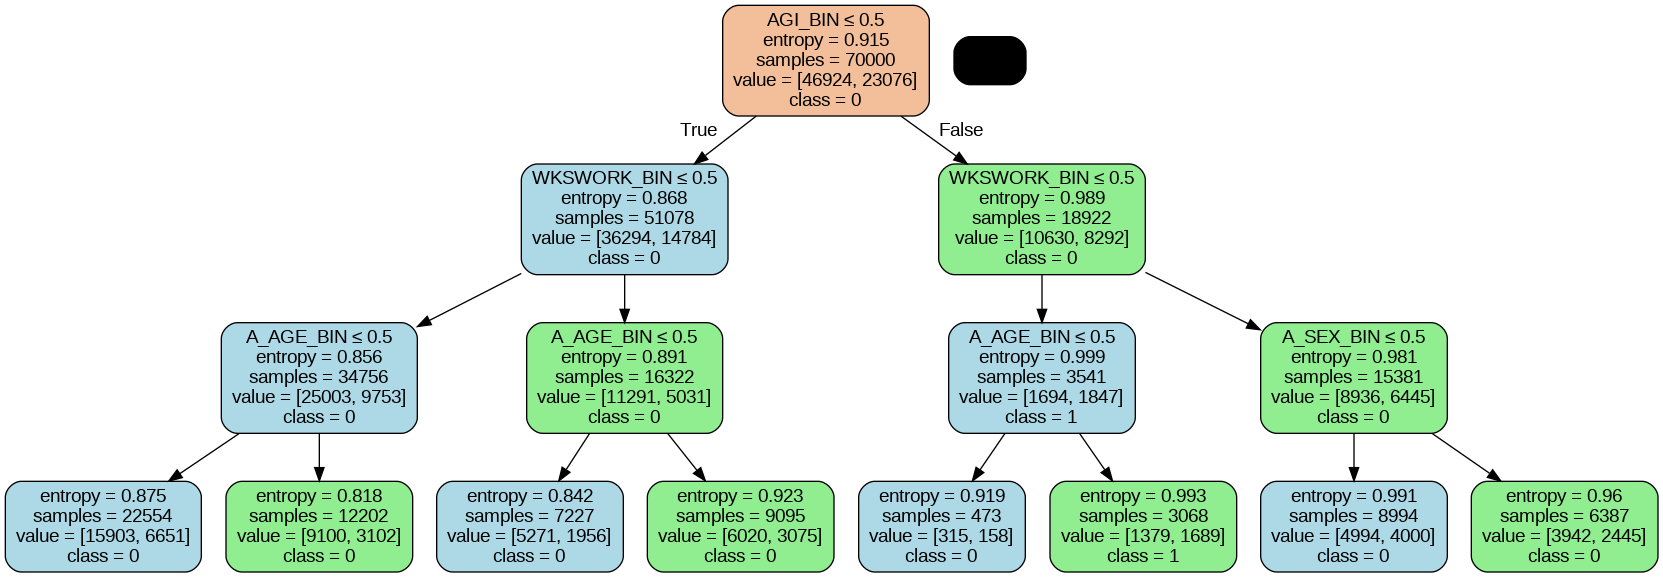

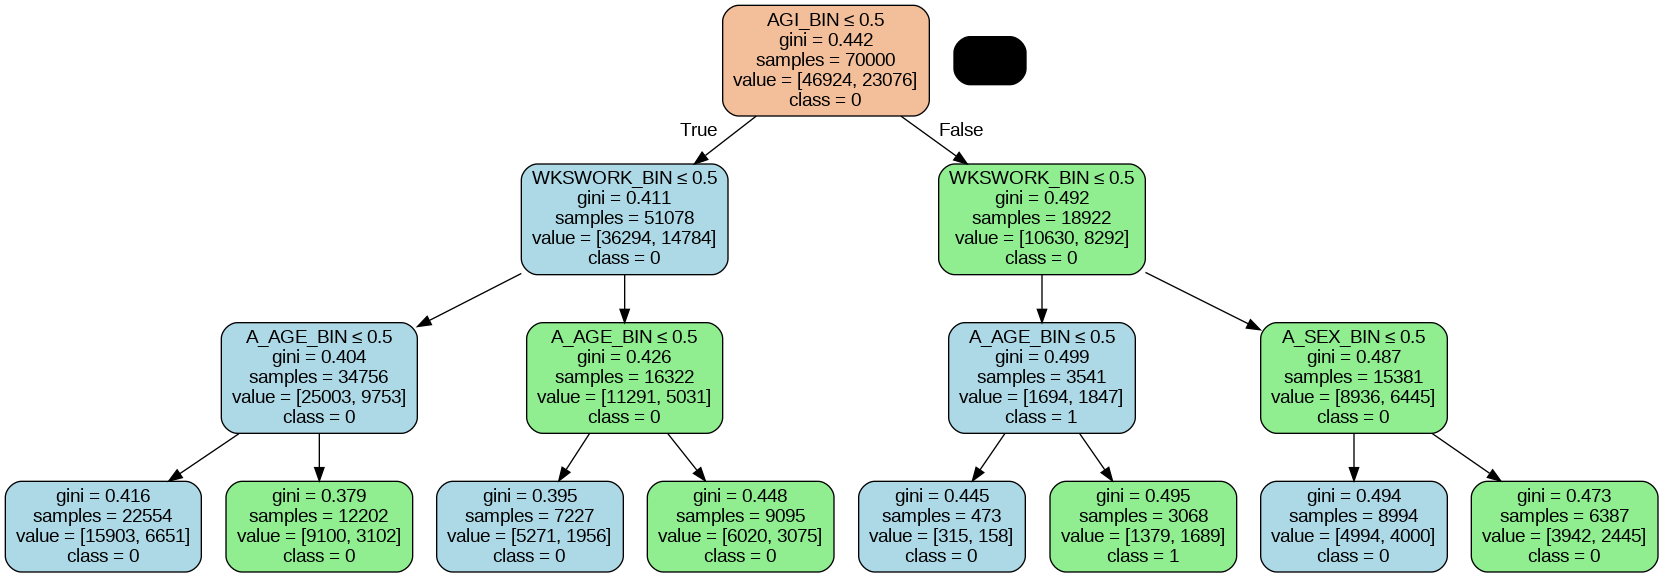

Comparing the entropy and gini decision trees, there are no changes in the decision order.

## Part 3

In [ ]:
# Read the data.
columnsToRead = ["AGI", "A_AGE", "WKSWORK", "A_SEX", "HAS_DIV"]
dataFrame = pd.read_excel(pathName + 'Census_Supplement.xlsx', sheet_name='Data', usecols=columnsToRead)


X = dataFrame.drop(["HAS_DIV"], axis=1)
y = dataFrame.HAS_DIV

# Partition the data into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Create a tree object to do classification with the entropy criterion.
clf = tree.DecisionTreeClassifier(criterion="gini", splitter='best', max_depth=3)
clf = clf.fit(X_train,y_train)

# Print the confusion matrix for the classifier with the entropy criterion.
y_true = y_test
y_pred = clf.predict(X_test)
print(confusion_matrix(y_true, y_pred))

# Print the cross-validation scores for the classifier with the entropy criterion.
scores = cross_val_score(clf, X_train, y_train)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[[18754  1367]
 [ 7864  2015]]
0.69 accuracy with a standard deviation of 0.00


Compared to the binary variables, the continuous version is slightly more accurate. The mean "cross_val_score" accuracy is .67 for the binary variables, and it is .69 for the continuous variabes. The performance does not change significantly between depths 3, 4, 5, and 10. Again, I compared these depths simply by changing the "max_depth" value.

In [6]:
# Write the classifier tree to a PNG file.

def writegraphtofile(clf, featurenames, classnames, pathname):
  dot_data = tree.export_graphviz(clf, feature_names=featurenames, impurity=True,
                                  class_names=classnames, filled=True, rounded=True, special_characters=True)
  graph = pydotplus.graph_from_dot_data(dot_data)
  colors = ('lightblue','lightgreen')
  edges = collections.defaultdict(list)
  for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
  for edge in edges:
    edges[edge].sort()
    for i in range(2):
      dest = graph.get_node(str(edges[edge][i]))[0]
      dest.set_fillcolor(colors[i])
  graph.write_png(pathname)

featureNames = ["AGI", "A_AGE", "WKSWORK", "A_SEX"]

writegraphtofile(clf, featureNames, ("0", "1"), "/content/drive/MyDrive/Colab Notebooks/Output/"+"gini_continuous_conttree.png")

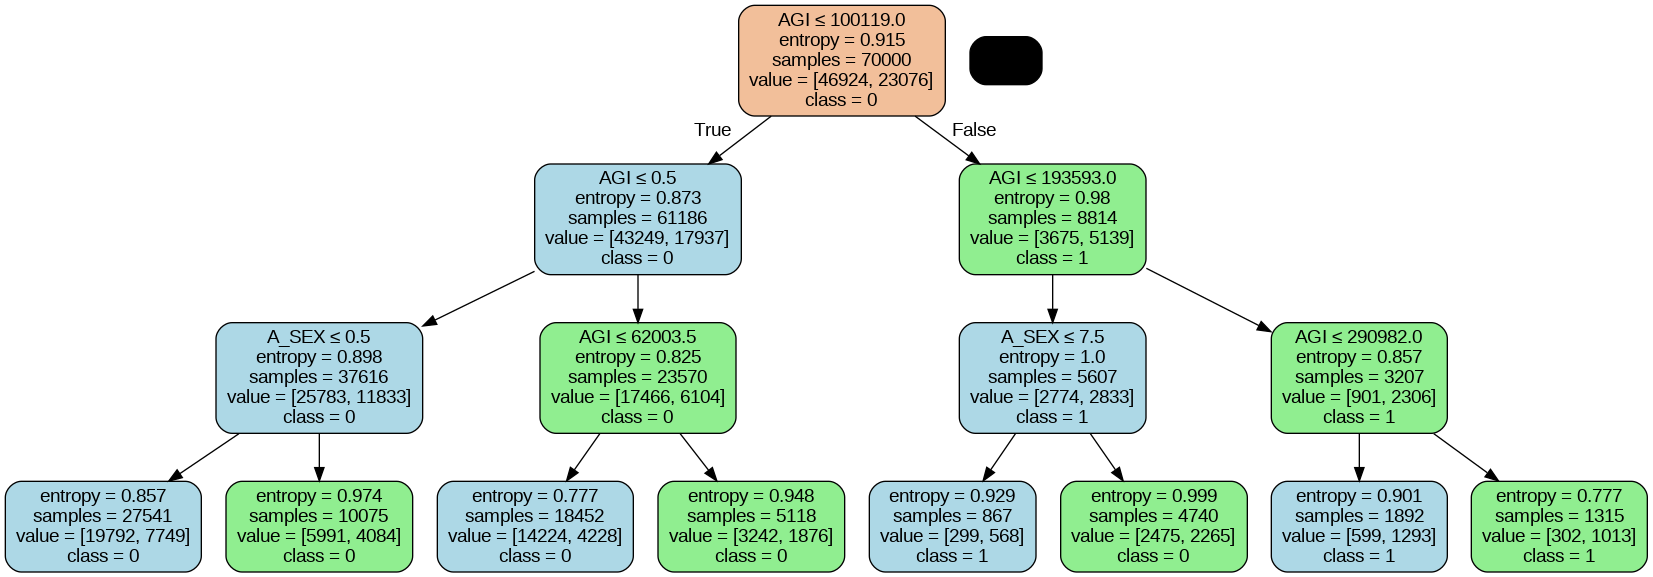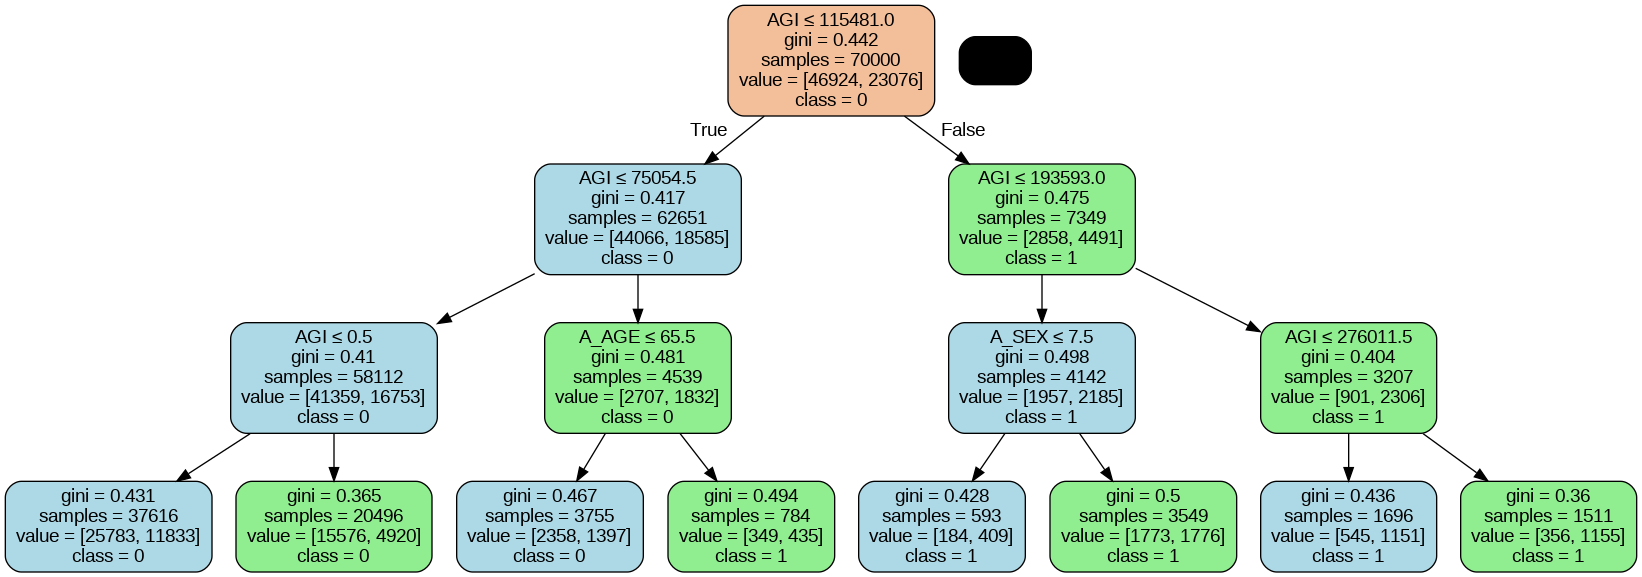

The same variable is chosen as the top decision for both the continuous entropy and continuous gini trees, but both trees differ from the corresponding binary trees. The continuous trees are very similar to each other.

## Part 4

In [7]:
from sklearn import ensemble

# Create a tree object to do classification with the entropy criterion.
clf = ensemble.RandomForestClassifier(n_estimators=200, criterion="gini", max_depth=3, min_samples_leaf=1, bootstrap=True)
clf = clf.fit(X_train,y_train)

# Print the confusion matrix for the classifier with the entropy criterion.
y_true = y_test
y_pred = clf.predict(X_test)
print(confusion_matrix(y_true, y_pred))

# Print the cross-validation scores for the classifier with the entropy criterion.
scores = cross_val_score(clf, X_train, y_train)
print("%0.5f accuracy with a standard deviation of %0.5f" % (scores.mean(), scores.std()))

[[19529   592]
 [ 9127   752]]
0.67374 accuracy with a standard deviation of 0.00051


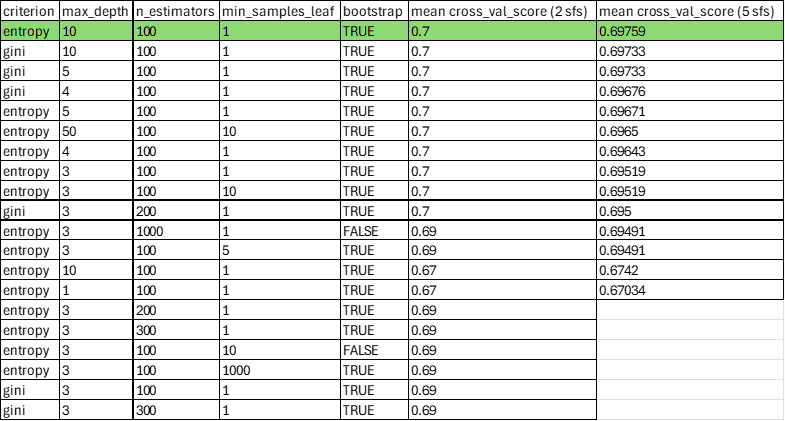

My experimentation efforts are documented above. The best model I tested is highlighted in green above.